In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 25

In [55]:
df = pd.read_csv('movies_cleaned.csv')

In [56]:
# Drop rows with zero revenue
df = df[df['revenue'] != 0]
df = df[df['budget'] != 0]

# Drop 2024 movies
df = df[df['release_date'] <= '2023-12-31']

In [57]:
# Engineering new profit margin feature
df['profit_margin'] = (df['revenue'] - df['budget']) / df['budget'] * 100

In [58]:
# Use IQR method to filter out outliers for revenue and budget
Q1_revenue = df['revenue'].quantile(0.25)
Q3_revenue = df['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
print(IQR_revenue)

Q1_budget = df['budget'].quantile(0.25)
Q3_budget = df['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget
print(IQR_budget)

# Filter out outliers
df_cleaned = df[
    (df['revenue'] >= Q1_revenue - 1.5 * IQR_revenue) & (df['revenue'] <= Q3_revenue + 1.5 * IQR_revenue) &
    (df['budget'] >= Q1_budget - 1.5 * IQR_budget) & (df['budget'] <= Q3_budget + 1.5 * IQR_budget)
]

26981562.5
17900000.0


In [59]:
df.sort_values('profit_margin', ascending=False).head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,profit_margin
3386,935991,Sedutores da Internet,0.0,0,Released,2019-10-13,7081810,0,True,NaN,3,NaN,NaN,pt,Sedutores da Internet,NaN,0.600,NaN,NaN,"Comedy, Drama, History, Music, Romance, Horror...",Nimo TV,NaN,NaN,NaN,2.360602e+08
3253,1029460,The Western,10.0,1,Released,2020-02-21,69000000,10,False,/klcYQ8v1FYbwHMvRqr4wUItQVQn.jpg,55,NaN,NaN,nl,De Western,A movie about 2 western partners who are looki...,0.600,/2jYQVDehisaz7cpnWLKOELTMYgU.jpg,TwoThousandFiveHundredDollaars,Western,Bikini Babes Productions,Netherlands,Dutch,NaN,1.254544e+08
3235,450154,Bellator 175: Rampage vs. King Mo 2,7.0,1,Released,2017-03-31,1033113,144,False,/9dC1bou5yrfZSr6Q6k6pEk879v3.jpg,1,http://bellator.spike.com/,NaN,en,Bellator 175: Rampage vs. King Mo 2,Bellator 175: Rampage vs. King Mo 2 was held o...,0.923,/2YG3MGIR7ikvZf9hAfsBd4J1cF7.jpg,Rampage vs. King Mo 2,TV Movie,"Bellator, Spike TV",United States of America,English,"sports, mixed martial arts, fighting",1.033112e+08
3281,1020249,The Parmesan Thieves,10.0,1,Released,2017-11-14,800000,3,False,/bE4AxlfA3EVKjTVxfGofNvkgU1D.jpg,3,https://www.youtube.com/watch?v=BerHXvrKxRI&li...,NaN,en,I Ladri di Parmigiano,A poor boy and his father wish to eat parmesan...,0.600,/wlWQuSmwGiScZRyyjsL2Ak8EoiC.jpg,Where is the parmesan!?,"Crime, Comedy, Drama",Movie Bros.,"Italy, United States of America","English, Italian",NaN,2.666657e+07
3427,1137028,Juvenile Drive,0.0,0,Released,2023-05-26,1000000,49,False,/eb8zctLoGZidQlN08vnj6tfnDr8.jpg,4,NaN,NaN,en,Juvenile Drive,When a kid is overwhelmed by various tasks in ...,0.600,/vFOaRSzAcVsXcHgWRokLSaZgeCf.jpg,ONE WEEK IN THE MAKING,"Comedy, Drama",Ki11er Productions,United States of America,NaN,"childish whim, low budget",2.499990e+07


**Questions**
1. Which production companies consistently produce the most profitable movies?
    - This question aims to identify the top production companies based on average profit margins, helping to understand what makes them successful.

In [60]:
# Split and explode the production_companies column, because there are multiple companies in a single cell
df['production_companies'] = df['production_companies'].str.split(', ')
df_exploded = df.explode('production_companies')

# Group by production companies and calculate the average profit_margin
avg_profit_margin = df_exploded.groupby('production_companies')['profit_margin'].mean().reset_index()

Text(0.5, 1.0, 'Distribution of Avg Profit Margin by Production Companies')

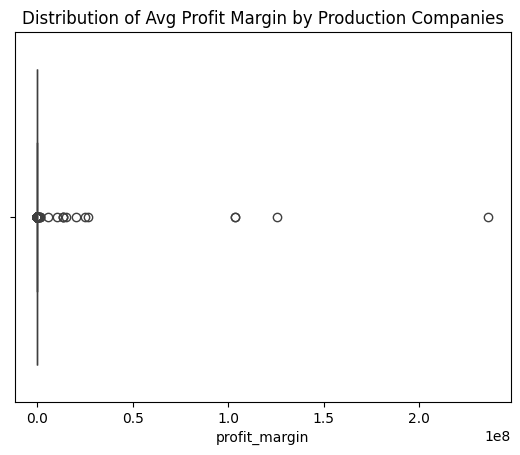

In [61]:
avg_profit_margin = avg_profit_margin.round(decimals = 0)
sns.boxplot(data=avg_profit_margin, x='profit_margin')
plt.title('Distribution of Avg Profit Margin by Production Companies')

In [62]:
# Plot doesn't work

#sns.barplot(data=avg_profit_margin, x='profit_margin', y='production_companies')
#plt.title('Avg Profit Margin by Production Companies')

2. What is the relationship between movie budgets and profit margins?
- Understanding how different budget levels impact profitability can guide future investments and production decisions. Are high-budget films
more successful, or do low-budget films offer better returns?

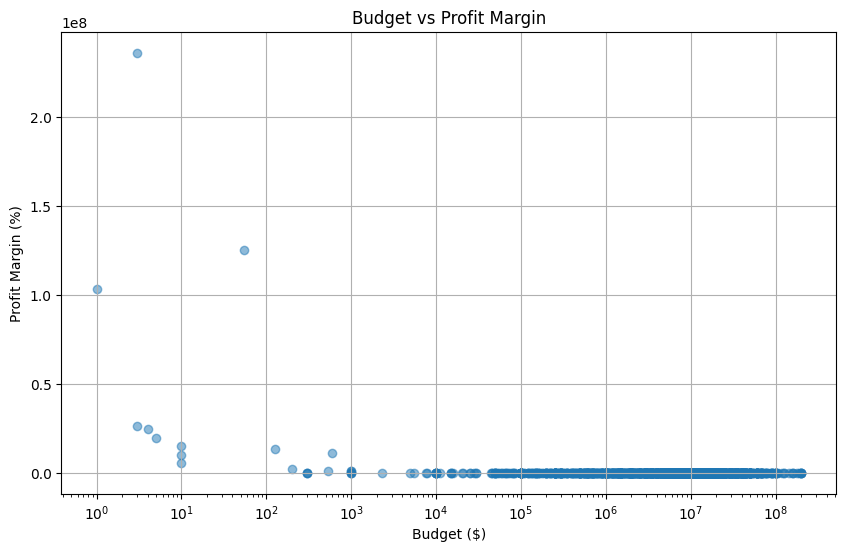

In [63]:
# Create a scatter plot to visualize the relationship between budget and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit_margin'], alpha=0.5)
plt.title('Budget vs Profit Margin')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
plt.xscale('log')  # Optional: Use log scale for better visibility
plt.grid()
plt.show()

3. How do factors like genre and average viewer ratings (vote_average) influence a movie's financial success?
- Analyzing the impact of genre and viewer ratings on revenue and profit margins can provide insights into audience preferences and what types of movies are likely to succeed.

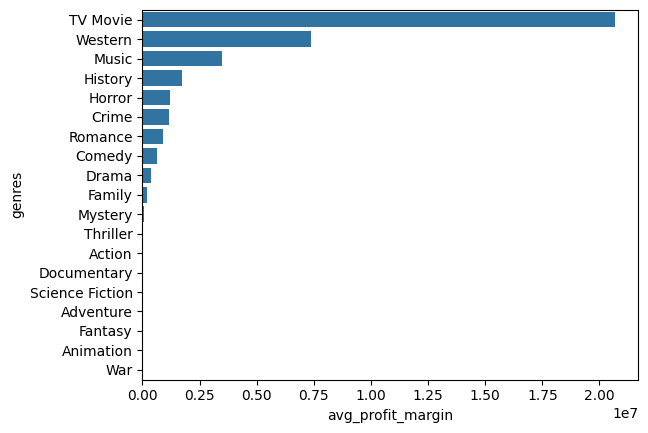

In [64]:
df['genres'] = df['genres'].str.split(', ')
df_genre_exploded = df.explode('genres')

genre_analysis = df_genre_exploded.groupby('genres').agg(
    avg_profit_margin=('profit_margin', 'mean'),
    avg_vote_average=('vote_average', 'mean')
).reset_index()

genre_analysis_sorted = genre_analysis.sort_values(by='avg_profit_margin', ascending=False)
#print(genre_analysis_sorted)
sns.barplot(data=genre_analysis_sorted, x='avg_profit_margin', y='genres')
plt.show()

4. What trends can be observed in movie profitability over time, especially concerning inflation?
- This question looks at how profit margins have changed over the years and how external economic factors, such as inflation, affect movie profitability.

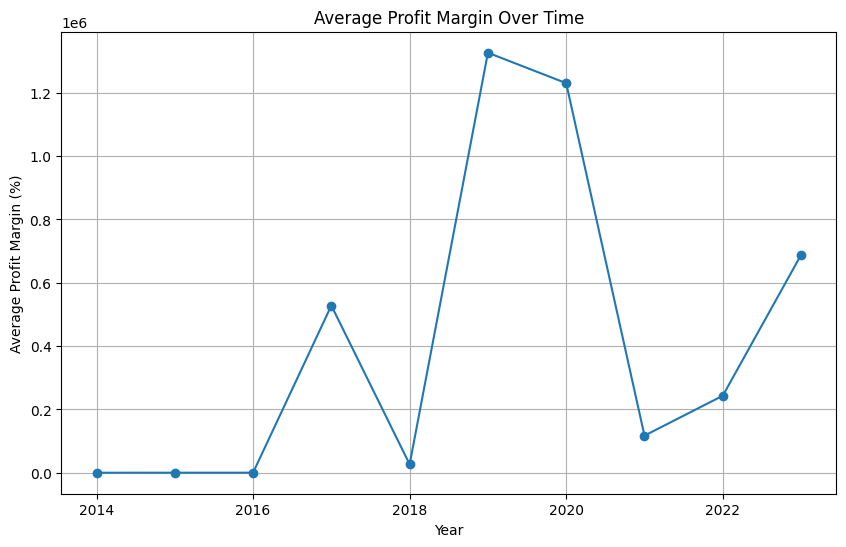

In [66]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

profit_margin_over_time = df.groupby('release_year').agg(
    avg_profit_margin=('profit_margin', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(profit_margin_over_time['release_year'], profit_margin_over_time['avg_profit_margin'], marker='o')
plt.title('Average Profit Margin Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit Margin (%)')
plt.grid()
plt.show()

5. How does the popularity score correlate with profit margins across different production companies?
- Investigating the relationship between a movie's popularity and its profitability can help assess whether a higher popularity score translates into better financial outcomes, guiding marketing and distribution strategies.

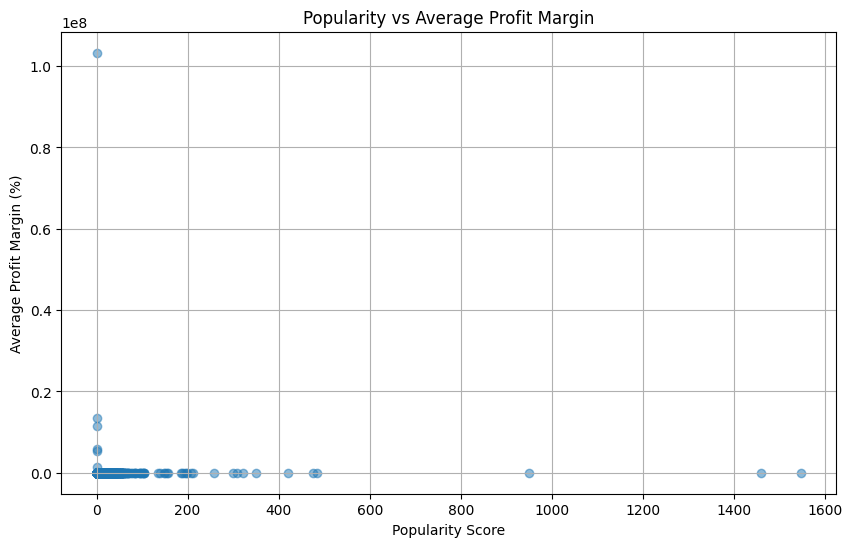

In [68]:
popularity_profit = df.groupby('popularity').agg(
    avg_profit_margin=('profit_margin', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(popularity_profit['popularity'], popularity_profit['avg_profit_margin'], alpha=0.5)
plt.title('Popularity vs Average Profit Margin')
plt.xlabel('Popularity Score')
plt.ylabel('Average Profit Margin (%)')
plt.grid()
plt.show()